畫圖
* df.plot(kind=...)
* plt.scatter/...
* ax.set_xlabel
* plt.xlabel

PolynomailFeatures

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

In [2]:
zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
with urlopen(zipurl) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zip_:
    zip_.extractall('/content/sample_data/BSD')

hour_df_raw = pd.read_csv('/content/sample_data/BSD/hour.csv')
day_df_raw = pd.read_csv('/content/sample_data/BSD/day.csv')

hour_df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


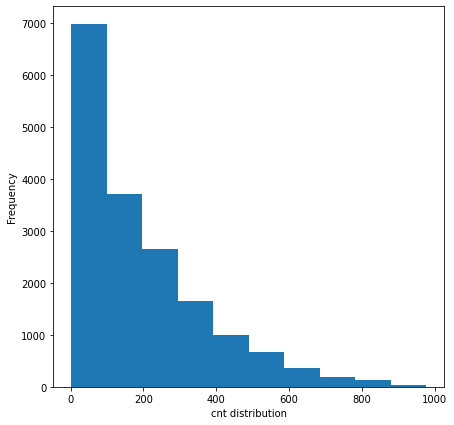

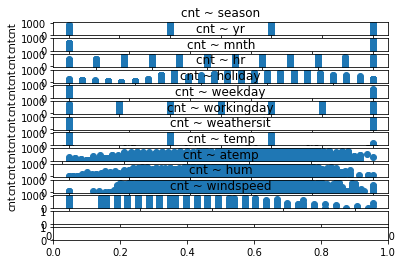

In [55]:
# hour_df_raw.drop(['casual','registered'],axis=1,inplace=True)
hour_df_raw.info()
hour_df_raw.describe()

# fig, ax = plt.subplots(3,1,figsize=(10,10))
hour_df_raw['cnt'].plot(kind='hist', figsize=(7,7))
plt.xlabel('cnt distribution')

# ax[1].scatter(hour_df_raw['temp'],hour_df_raw['cnt'])
# ax[1].set_xlabel('cnt~temp')

# ax[2].scatter(hour_df_raw['atemp'],hour_df_raw['cnt'])
# ax[2].set_xlabel('cnt~atemp')
plot_nums = len(hour_df_raw.columns)
for i in range(plot_nums):
  col_name = hour_df_raw.columns[i]
  if col_name == 'instant' or col_name == 'cnt'  or col_name == 'dteday':
    continue
  else:
    ax[count].figsize=(7,7)
    ax[count].scatter(hour_df_raw[col_name], hour_df_raw['cnt'])
    ax[count].set_xlabel(col_name)
    ax[count].set_ylabel('cnt')
    ax[count].set_title('cnt ~ {}'.format(col_name))
    count = count+1

In [3]:
df = hour_df_raw.copy()
y = df['cnt']
X = df.drop(['cnt','instant','dteday'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print('error : %.4f' % (sqrt(mean_squared_error(y_test, predictions))))

error : 0.00


In [4]:
from sklearn.preprocessing import PolynomialFeatures

for i in range(2,5):
  poly = PolynomialFeatures(i)
  X_train_ = poly.fit_transform(X_train)
  X_test_ = poly.fit_transform(X_test)
  lr = linear_model.LinearRegression()
  lr.fit(X_train_, y_train)
  pred = lr.predict(X_test_)
  print('error: %.4f' % sqrt(mean_squared_error(pred, y_test)))

error: 0.0000
error: 0.0000
error: 0.0013
